In [1]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('fivethirtyeight')
import matplotlib.ticker as mticker
from scipy import stats

In [2]:
df = pd.read_csv('MasterReddit_Roberta2.csv')

In [3]:
df

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,subreddit,ID,body_time,title,url,...,comment_time,comment,c_Score,com_ID,comment count,topic_vaccine,TakeEmOut,index.1,label,score.1
0,0,0,0,0,577457,HealthAnxiety,chronicallyterminal,NaN,NaN,NaN,...,2016-06-14T14:36:24,About six years ago I was diagnosed with Hodgk...,242,NaN,NaN,0,0,0,LABEL_0,0.978582
1,1,1,1,1,577447,HealthAnxiety,bamsurk,NaN,NaN,NaN,...,2018-08-18T18:29:24,"Hey listen,\n\nI have been where you have been...",312,NaN,NaN,0,0,0,LABEL_1,0.707608
2,2,2,2,2,579206,VACCINES,milou123,NaN,NaN,NaN,...,2018-10-16T09:18:19,Hey I would like to hear if somebody is also s...,9,NaN,NaN,0,0,0,LABEL_0,0.582459
3,3,3,3,3,577841,HealthAnxiety,Keir86,NaN,NaN,NaN,...,2019-07-14T17:49:33,I've recently got through health anxiety and w...,75,NaN,NaN,0,0,0,LABEL_1,0.989772
4,4,4,4,4,577668,HealthAnxiety,OneStepAway14,NaN,NaN,NaN,...,2019-11-05T20:01:03,"Hi everyone. This will be a long post, but I t...",101,NaN,NaN,0,0,0,LABEL_1,0.994981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69074,69074,69074,74030,76982,414732,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T08:45:59,Hello fellow Antipoleno! Before ng Omicron sur...,1,xilver,20.0,0,0,0,LABEL_1,0.984277
69075,69075,69075,74031,76983,414729,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T09:11:03,Originally it's 6 months from 2nd shot of boos...,5,Infernalknights,20.0,0,0,0,LABEL_1,0.777796
69076,69076,69076,74032,76984,389867,Coronavirus_BC,IamVanCat,2022-02-11T00:41:15,"Who else is happy other ""health professionals""...",https://www.reddit.com/r/Coronavirus_BC/commen...,...,2022-03-10T10:31:35,COVID vaccines are not effective,1,Psychadelli,99.0,0,0,0,LABEL_0,0.993194
69077,69077,69077,74033,76985,414726,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T12:16:53,Feeling ko they're encouraging people din to h...,5,itsyaghorl,20.0,0,0,0,LABEL_1,0.998998


In [5]:
#df = pd.read_csv('Reddit_SA_Results.csv')
df['score.1'] = np.interp(df['score.1'], [.5,1], [0,1])
df['score.1'] = df['score.1'].where(df['label']=='LABEL_1', df['score.1'] * -1)#
df

,Unnamed: 0,index,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,subreddit,ID,body_time,title,url,...,comment_time,comment,c_Score,com_ID,comment count,topic_vaccine,TakeEmOut,index.1,label,score.1
0,0,0,0,0,577457,HealthAnxiety,chronicallyterminal,NaN,NaN,NaN,...,2016-06-14T14:36:24,About six years ago I was diagnosed with Hodgk...,242,NaN,NaN,0,0,0,LABEL_0,-0.957163
1,1,1,1,1,577447,HealthAnxiety,bamsurk,NaN,NaN,NaN,...,2018-08-18T18:29:24,"Hey listen,\n\nI have been where you have been...",312,NaN,NaN,0,0,0,LABEL_1,0.415216
2,2,2,2,2,579206,VACCINES,milou123,NaN,NaN,NaN,...,2018-10-16T09:18:19,Hey I would like to hear if somebody is also s...,9,NaN,NaN,0,0,0,LABEL_0,-0.164918
3,3,3,3,3,577841,HealthAnxiety,Keir86,NaN,NaN,NaN,...,2019-07-14T17:49:33,I've recently got through health anxiety and w...,75,NaN,NaN,0,0,0,LABEL_1,0.979544
4,4,4,4,4,577668,HealthAnxiety,OneStepAway14,NaN,NaN,NaN,...,2019-11-05T20:01:03,"Hi everyone. This will be a long post, but I t...",101,NaN,NaN,0,0,0,LABEL_1,0.989962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69074,69074,69074,74030,76982,414732,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T08:45:59,Hello fellow Antipoleno! Before ng Omicron sur...,1,xilver,20.0,0,0,0,LABEL_1,0.968554
69075,69075,69075,74031,76983,414729,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T09:11:03,Originally it's 6 months from 2nd shot of boos...,5,Infernalknights,20.0,0,0,0,LABEL_1,0.555591
69076,69076,69076,74032,76984,389867,Coronavirus_BC,IamVanCat,2022-02-11T00:41:15,"Who else is happy other ""health professionals""...",https://www.reddit.com/r/Coronavirus_BC/commen...,...,2022-03-10T10:31:35,COVID vaccines are not effective,1,Psychadelli,99.0,0,0,0,LABEL_0,-0.986388
69077,69077,69077,74033,76985,414726,Coronavirus_PH,moshiyadafne,2022-03-10T02:02:05,Question: will it be harmful or mana-nullify y...,https://www.reddit.com/gallery/tasz6u,...,2022-03-10T12:16:53,Feeling ko they're encouraging people din to h...,5,itsyaghorl,20.0,0,0,0,LABEL_1,0.997996


In [7]:
#Fixing format like_count
dfT = (df['Datetime'] >= '2020-01-01') 
dfT = df.loc[dfT]
dfT['like_count']= pd.to_numeric(dfT['like_count'])
df = dfT
#SCALING DATA TO [-1,1].
df['score'] = np.interp(df['score'], [.5,1], [0,1])



C:\Users\chadm\AppData\Local\Temp/ipykernel_19676/2746167534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT['like_count']= pd.to_numeric(dfT['like_count'])
C:\Users\chadm\AppData\Local\Temp/ipykernel_19676/2746167534.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'] = np.interp(df['score'], [.5,1], [0,1])


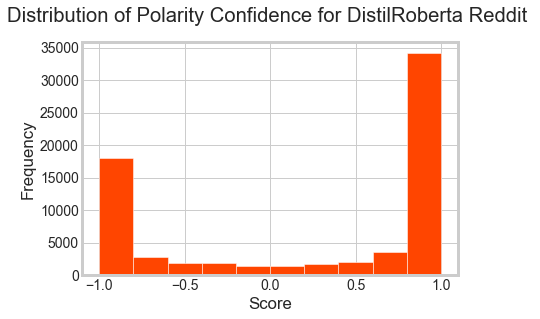

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
df['score.1'].plot(kind='hist', color ='orangered')
plt.title('Distribution of Polarity Confidence for DistilRoberta Reddit ', pad = 20)
plt.xlabel('Score')

plt.savefig('RedditDRHists.png', dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')
df['score'].plot(kind='hist', color ='deepskyblue')
plt.title('Distribution of Polarity Confidence for DistilRoberta Twitter ', pad = 20)
plt.xlabel('Score')

plt.savefig('RedditDRHists.png', dpi=300, bbox_inches="tight")
plt.show()


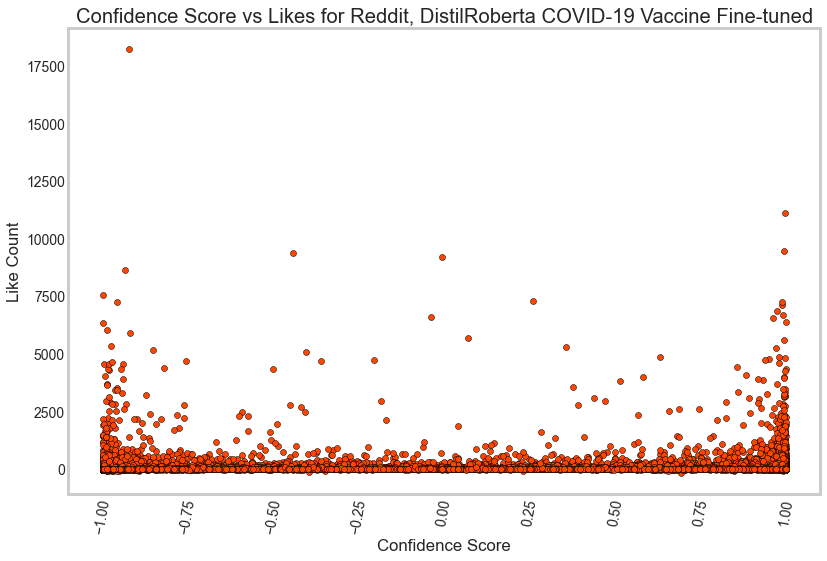

In [39]:
# LIKE count vs score.1
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['score.1'], df['c_Score'],  color='orangered', edgecolor='Black')
#plt.gca().invert_xaxis()
#plt.title('score.1 vs Likes for Twitter, DistilBERT Fine-tuned SST2')
#plt.title('score.1 vs Likes for Twitter, DistilBERT Fine-tuned IMDb')
#plt.title('score.1 vs Likes for Reddit, DistilBERT Fine-tuned SST2')
plt.title('Confidence Score vs Likes for Reddit, DistilRoberta COVID-19 Vaccine Fine-tuned')
#plt.title('score.1 vs Likes for Reddit, DistilBERT Fine-tuned IMDb')
#plt.xticks(df['Datetime'][::5000],  rotation='vertical')
plt.ylabel('Like Count')
plt.xlabel('Confidence Score')
#plt.axhline(x=0.0, color='red',lw=1, linestyle='--')
plt.grid(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation = 80)
#plt.savefig('CoreVsLikes_Reddit_IMdb.png', dpi=300, bbox_inches = "tight")
#plt.savefig('CoreVsLikes_Twitter_SST2.png', dpi=300, bbox_inches = "tight")
plt.savefig('CoreVsLikes_Reddit_DR.png', dpi=300, bbox_inches = "tight")
#plt.savefig('CoreVsLikes_Reddit_SST2.png', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
# LIKE count vs score.1
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['score'], df['like_count'],  color='deepskyblue', edgecolor='Black')
#plt.gca().invert_xaxis()
#plt.title('score.1 vs Likes for Twitter, DistilBERT Fine-tuned SST2')
#plt.title('score.1 vs Likes for Twitter, DistilBERT Fine-tuned IMDb')
#plt.title('score.1 vs Likes for Reddit, DistilBERT Fine-tuned SST2')
plt.title('Confidence Score vs Likes for Twitter, DistilRoberta COVID-19 Vaccine Fine-tuned')
#plt.title('score.1 vs Likes for Reddit, DistilBERT Fine-tuned IMDb')
#plt.xticks(df['Datetime'][::5000],  rotation='vertical')
plt.ylabel('Like Count')
plt.xlabel('Confidence score')
#plt.axhline(x=0.0, color='red',lw=1, linestyle='--')
plt.grid(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation = 80)
#plt.savefig('CoreVsLikes_Reddit_IMdb.png', dpi=300, bbox_inches = "tight")
#plt.savefig('CoreVsLikes_Twitter_SST2.png', dpi=300, bbox_inches = "tight")
plt.savefig('CoreVsLikes_Twitter_DR.png', dpi=300, bbox_inches = "tight")
#plt.savefig('CoreVsLikes_Reddit_SST2.png', dpi=300, bbox_inches = "tight")
plt.show()

In [11]:
Jan2020 = (df['comment_time'] >= '2020-01-01') & (df['comment_time'] < '2020-02-01')
Jan2020 = df.loc[Jan2020]

Feb2020 = (df['comment_time'] >= '2020-02-01') & (df['comment_time'] < '2020-03-01')
Feb2020 = df.loc[Feb2020]

Mar2020 = (df['comment_time'] >= '2020-03-01') & (df['comment_time'] < '2020-04-01')
Mar2020 = df.loc[Mar2020]

Apr2020 = (df['comment_time'] >= '2020-04-01') & (df['comment_time'] < '2020-05-01')
Apr2020 = df.loc[Apr2020]


May2020 = (df['comment_time'] >= '2020-05-01') & (df['comment_time'] < '2020-06-01')
May2020 = df.loc[May2020]

Jun2020 = (df['comment_time'] >= '2020-06-01') & (df['comment_time'] < '2020-07-01')
Jun2020 = df.loc[Jun2020]

Jul2020 = (df['comment_time'] >= '2020-07-01') & (df['comment_time'] < '2020-08-01')
Jul2020 = df.loc[Jul2020]

Aug2020 = (df['comment_time'] >= '2020-08-01') & (df['comment_time'] < '2020-09-01')
Aug2020 = df.loc[Aug2020]

Sep2020 = (df['comment_time'] >= '2020-09-01') & (df['comment_time'] < '2020-10-01')
Sep2020 = df.loc[Sep2020]

Oct2020 = (df['comment_time'] >= '2020-10-01') & (df['comment_time'] < '2020-11-01')
Oct2020 = df.loc[Oct2020]

Nov2020 = (df['comment_time'] >= '2020-11-01') & (df['comment_time'] < '2020-12-01')
Nov2020 = df.loc[Nov2020]

Dec2020 = (df['comment_time'] >= '2020-12-01') & (df['comment_time'] < '2021-01-01')
Dec2020 = df.loc[Dec2020]


Jan2021 = (df['comment_time'] >= '2021-01-01') & (df['comment_time'] < '2021-02-01')
Jan2021 = df.loc[Jan2021]

Feb2021 = (df['comment_time'] >= '2021-02-01') & (df['comment_time'] < '2021-03-01')
Feb2021 = df.loc[Feb2021]

Mar2021 = (df['comment_time'] >= '2021-03-01') & (df['comment_time'] < '2021-04-01')
Mar2021 = df.loc[Mar2021]

Apr2021 = (df['comment_time'] >= '2021-04-01') & (df['comment_time'] < '2021-05-01')
Apr2021 = df.loc[Apr2021]

May2021 = (df['comment_time'] >= '2021-05-01') & (df['comment_time'] < '2021-06-01')
May2021 = df.loc[May2021]

Jun2021 = (df['comment_time'] >= '2021-06-01') & (df['comment_time'] < '2021-07-01')
Jun2021 = df.loc[Jun2021]

Jul2021 = (df['comment_time'] >= '2021-07-01') & (df['comment_time'] < '2021-08-01')
Jul2021 = df.loc[Jul2021]

Aug2021 = (df['comment_time'] >= '2021-08-01') & (df['comment_time'] < '2021-09-01')
Aug2021 = df.loc[Aug2021]

Sep2021 = (df['comment_time'] >= '2021-09-01') & (df['comment_time'] < '2021-10-01')
Sep2021 = df.loc[Sep2021]

Oct2021 = (df['comment_time'] >= '2021-10-01') & (df['comment_time'] < '2021-11-01')
Oct2021 = df.loc[Oct2021]

Nov2021 = (df['comment_time'] >= '2021-11-01') & (df['comment_time'] < '2021-12-01')
Nov2021 = df.loc[Nov2021]

Dec2021 = (df['comment_time'] >= '2021-12-01') & (df['comment_time'] < '2022-01-01')
Dec2021 = df.loc[Dec2021]

Jan2022 = (df['comment_time'] >= '2022-01-01') & (df['comment_time'] < '2022-02-01')
Jan2022 = df.loc[Jan2022]

Feb2022 = (df['comment_time'] >= '2022-02-01') & (df['comment_time'] < '2022-03-01')
Feb2022 = df.loc[Feb2022]

D:\anaconda3\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


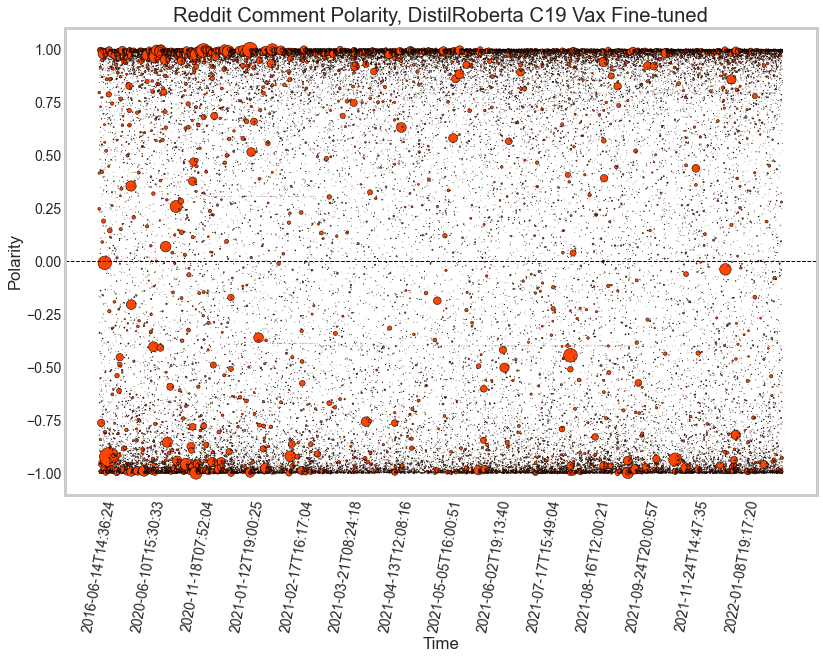

In [14]:

#Reddit DR
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['comment_time'], df['score.1'],  s = df['c_Score']/50, color='orangered', edgecolor='Black')
#plt.gca().invert_xaxis()
plt.title('Reddit Comment Polarity, DistilRoberta C19 Vax Fine-tuned')
plt.xticks(df['comment_time'][::5000],  rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Polarity')
plt.axhline(y=0.0, color='black',lw=1, linestyle='--')
plt.grid(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation = 80)
plt.savefig('PolarityRedditDRC19Vax.png', dpi=300, bbox_inches = "tight")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(df['Datetime'], df['score'],  s = df['like_count']/50, color='deepskyblue', edgecolor='Black')
#plt.gca().invert_xaxis()
plt.title('Reddit Comment Polarity, DistilRoberta C19 Vax Fine-tuned')
plt.xticks(df['Datetime'][::5000],  rotation='vertical')
plt.xlabel('Time')
plt.ylabel('Polarity')
plt.axhline(y=0.0, color='black',lw=1, linestyle='--')
plt.grid(False)
ax.set_facecolor('xkcd:white')
plt.xticks(rotation = 80)
plt.savefig('PolarityTwitterDRC19Vax.png', dpi=300, bbox_inches = "tight")
plt.show()

In [16]:
dates = [Jan2020,
        Feb2020,
        Mar2020,
        Apr2020,
        May2020,
        Jun2020,
        Jul2020,
        Aug2020,
        Sep2020,
        Oct2020,
        Nov2020,
        Dec2020,
        Jan2021,
        Feb2021,
        Mar2021,
        Apr2021,
        May2021,
        Jun2021,
        Jul2021,
        Aug2021,
        Sep2021,
        Oct2021,
        Nov2021,
        Dec2021,
        Jan2022,
        Feb2022]


In [17]:
i = 0

monthP=[]
for date in dates:
    
    print(date['label'].value_counts(normalize=True).reset_index(name='percentage'))
    t = date['label'].value_counts(normalize=True).reset_index(name='percentage')
    monthP.append(t)
   

   

     index  percentage
0  LABEL_1    0.504854
1  LABEL_0    0.495146
     index  percentage
0  LABEL_0    0.512748
1  LABEL_1    0.487252
     index  percentage
0  LABEL_1    0.530907
1  LABEL_0    0.469093
     index  percentage
0  LABEL_1    0.552614
1  LABEL_0    0.447386
     index  percentage
0  LABEL_1    0.506711
1  LABEL_0    0.493289
     index  percentage
0  LABEL_0    0.505226
1  LABEL_1    0.494774
     index  percentage
0  LABEL_1    0.545041
1  LABEL_0    0.454959
     index  percentage
0  LABEL_1    0.558077
1  LABEL_0    0.441923
     index  percentage
0  LABEL_1    0.523697
1  LABEL_0    0.476303
     index  percentage
0  LABEL_1    0.529412
1  LABEL_0    0.470588
     index  percentage
0  LABEL_1    0.551034
1  LABEL_0    0.448966
     index  percentage
0  LABEL_1    0.551837
1  LABEL_0    0.448163
     index  percentage
0  LABEL_1    0.643236
1  LABEL_0    0.356764
     index  percentage
0  LABEL_1    0.681386
1  LABEL_0    0.318614
     index  percentage
0  LABEL_1 

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline, BSpline

In [20]:
dp = pd.read_csv('Combined_Polarity.csv')

In [21]:
dp

,Month,Reddit_Pos,Reddit_Neg,Twitter_Pos,Twitter_Neg,Reddit_IMDB_pos,Reddit_IMDB_neg,Twitter_IMDB_pos,Twitter_IMDB_neg,Twitter_DR_Pos,Twitter_DR_Neg,Reddit_DR_Pos,Reddit_DR_Neg,Reddit_NEW_pos,Reddit_NEW_neg
0,Jan2020,0.189320,0.810680,0.210000,0.790000,0.334951,0.665049,0.394637,0.605363,0.464076,0.500000,0.447130,0.552870,0.504854,0.495146
1,Feb2020,0.116147,0.883853,0.173992,0.826008,0.274788,0.725212,0.424977,0.575023,0.543801,0.456199,0.376771,0.623229,0.487252,0.512748
2,Mar2020,0.148834,0.851166,0.196492,0.803508,0.287380,0.712620,0.394823,0.605177,0.503899,0.496101,0.400549,0.599451,0.530907,0.469093
3,Apr2020,0.148123,0.851877,0.212286,0.787714,0.283512,0.716488,0.400660,0.599340,0.472108,0.527892,0.432976,0.567024,0.552614,0.447386
4,May2020,0.137255,0.862745,0.218211,0.781789,0.283497,0.716503,0.397761,0.602239,0.452168,0.547832,0.377451,0.622549,0.506711,0.493289
5,Jun2020,0.151345,0.848655,0.221452,0.778548,0.274664,0.725336,0.411730,0.588270,0.473351,0.526649,0.391256,0.608744,0.494774,0.505226
6,Jul2020,0.137902,0.862098,0.240764,0.759236,0.329103,0.670897,0.422310,0.577690,0.467556,0.532444,0.414552,0.585448,0.545041,0.454959
7,Aug2020,0.150376,0.849624,0.225571,0.774429,0.308271,0.691729,0.412456,0.587544,0.428722,0.571278,0.437343,0.562657,0.558077,0.441923
8,Sep2020,0.144552,0.855448,0.195179,0.804821,0.295577,0.704423,0.375836,0.624164,0.404228,0.595772,0.394822,0.605178,0.523697,0.476303
9,Oct2020,0.172065,0.827935,0.203804,0.796196,0.299595,0.700405,0.384181,0.615819,0.419296,0.580704,0.380567,0.619433,0.529412,0.470588


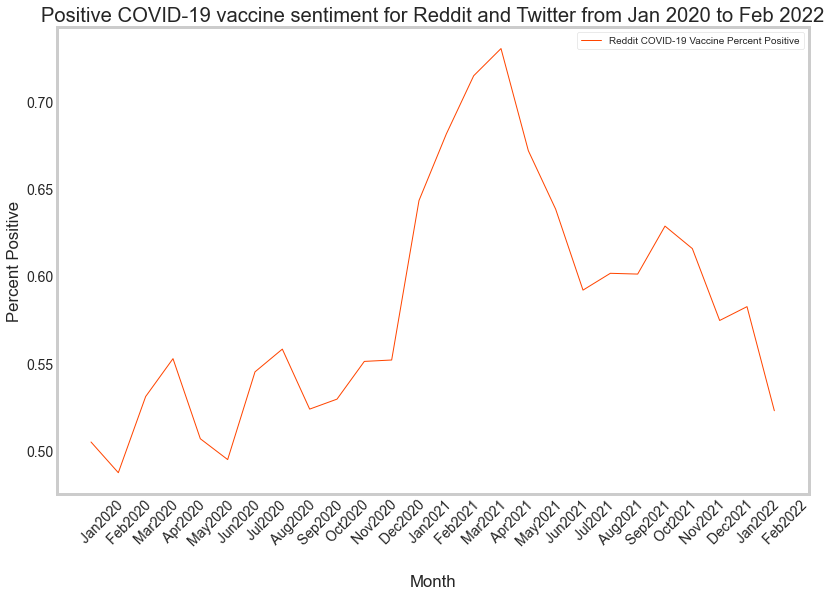

In [22]:

import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(12, 8))
y = dp.Month
#x = dp['Twitter_Pos']
#x2 = dp['Reddit_Pos']
#x3 = dp['Reddit_IMDB_pos']
#x4 = dp['Twitter_IMDB_pos']
#x5 = dp['Twitter_DR_Pos']
x6 = dp['Reddit_NEW_pos']
plt.grid(False)


#plt.plot(y, x, label = "Twitter SST-2 Percent Positive", color='deepskyblue', linewidth=1)
#plt.plot(y, x2, label = "Reddit SST-2 Percent Positive", color='red', linewidth=1)
#plt.plot(y, x3, label = "REDDIT IMDB Percent Positive", color='firebrick', linewidth=1)
#plt.plot(y, x4, label = "Twitter IMDB Percent Positive", color='cyan', linewidth=1)
#plt.plot(y, x5, label = "Twitter COVID-19 Vaccine Percent Positive", color='blue', linewidth=1)
plt.plot(y, x6, label = "Reddit COVID-19 Vaccine Percent Positive", color='orangered', linewidth=1)
plt.legend(loc=1, prop={'size': 10}, fontsize='xx-small')

ax.set_facecolor('xkcd:white')
plt.title('Positive COVID-19 vaccine sentiment for Reddit and Twitter from Jan 2020 to Feb 2022')
plt.xlabel('Month')
plt.ylabel('Percent Positive')
plt.xticks(rotation = 45)
#plt.savefig('CombinedPolarity_4.13_test.png', dpi=300, bbox_inches = "tight")
plt.show()


In [ ]:
#Reddit Numbers

In [36]:
#Max Polarity
Jan2020['label'].value_counts(normalize=True).rename_axis('polarity').reset_index(name='percentage')

,polarity,percentage
0,LABEL_1,0.504854
1,LABEL_0,0.495146


In [38]:
#Min polarity
Apr2021['label'].value_counts(normalize=True).rename_axis('polarity').reset_index(name='percentage')

,polarity,percentage
0,LABEL_1,0.730326
1,LABEL_0,0.269674


In [23]:
#Reddit Numbers
dNeg = df.loc[df['label'] =='LABEL_0']
dPos = df.loc[df['label'] =='LABEL_1']

In [24]:
print(len(dNeg))
print(len(dPos))
# Negative 26098
# Positive 42981

26098
42981


In [25]:
dNeg['score.1'].min()

-0.9988833665847776

In [26]:
dNeg['score.1'].mean()

-0.804191086440993

In [27]:
dNeg['score.1'].max()

-4.744529724121094e-05

In [33]:
dNeg['score.1'].std()

0.265692477018398

In [28]:
dPos['score.1'].min()

0.00015473365783691406

In [29]:
dPos['score.1'].mean()

0.868935612086123

In [30]:
dPos['score.1'].max()

0.9988869428634644

In [31]:
dPos['score.1'].std()

0.2270686591291374